In [1]:
import numpy as np
import pandas as pd

1. 分别统计男生和女生的出生人数
2. 有多少个不重复的名字
3. 横坐标为年份，纵坐标为数量，男女不同的走势图

In [4]:
yob1880 = pd.read_csv('babynames/yob1880.txt',names=['name','sex','num'])

In [11]:
df = pd.DataFrame([], columns=['name','sex','num'])
for year in range(1880,2011):
    df_for = pd.read_csv('babynames/yob%d.txt'%year,names=['name','sex','num'])
    df_for['year'] = year
    df = pd.concat([df,df_for])

/Users/MacBook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 3 columns):
name    1690784 non-null object
sex     1690784 non-null object
num     1690784 non-null object
dtypes: object(3)
memory usage: 51.6+ MB


In [8]:
df.groupby('sex')['num'].sum()

sex
F    159990140
M    162412587
Name: num, dtype: int64

In [10]:
df.groupby('name')['num'].sum().shape

(88496,)

In [12]:
df.head()

,name,num,sex,year
0,Mary,7065,F,1880.0
1,Anna,2604,F,1880.0
2,Emma,2003,F,1880.0
3,Elizabeth,1939,F,1880.0
4,Minnie,1746,F,1880.0


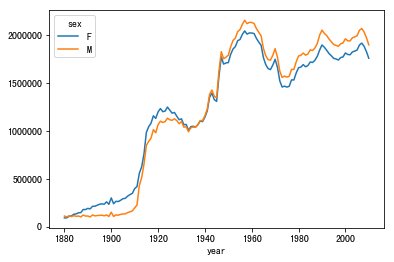

In [14]:
df.pivot_table(index='year', columns='sex', values='num', aggfunc=sum).plot()